In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [2]:
device = torch.device("cuda")

In [3]:
#kwargs =  if use_cuda else {}
ana_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
        transform=transforms.ToTensor()),
            batch_size=640, shuffle=False, num_workers= 16, pin_memory= True)

In [4]:
%%time

data_im={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]};
data_la={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]};

data_s=0;
for i, (data,target) in enumerate(ana_loader):
    data_len=target.shape[0]
    for data_len_i in range(data_len):
        data_it_5=data[data_len_i][0];
        data_it_l=target[data_len_i];
        data_it_t=target.numpy()[data_len_i]
        #print((data_it_t))
        data_im[data_it_t].append(data_it_5)
        data_la[data_it_t].append(data_it_l)
        #.append(data_it_5)
    if(data_s>100):
        break;

#打印各个类别数量
print([len(data_im[i]) for i in range(10)])


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
CPU times: user 18.1 s, sys: 766 ms, total: 18.9 s
Wall time: 3.04 s


In [5]:
#plt.figure(figsize=(10,10))
#for data_i in range(70):
#    plt.subplot(10,8,data_i+1)
#    plt.imshow(data_5[data_i],cmap='gray')

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        return F.log_softmax(x, dim=1)

In [7]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
ceriation = nn.CrossEntropyLoss()

#Train
model.train()
model_loss=[]
for epoch in range(1, 20):
    optimizer.zero_grad()
    data, target = data_im[0][epoch], data_la[0][epoch]
    output = model(data)
    #print(type(target))
    loss = ceriation(output, target.view(-1))
    loss.backward()
    optimizer.step()
    model_loss.append(loss.item())

#print(model_loss[len(model_loss)-1])

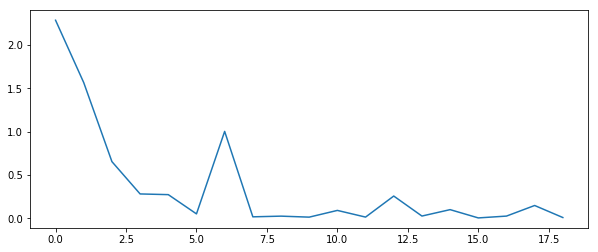

In [8]:
plt.figure(figsize=(10,4))
#for data_i in range(data_s):
plt.plot(model_loss)

In [9]:
#Test
model.eval()
data, target = data_im[0][0], data_la[0][0]
output = model(data)
print(np.argmax(output.detach().numpy()),'~=',target.numpy())

0 ~= 0


Text(0.5,1,'Model fc1')

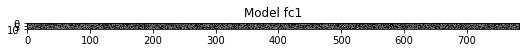

In [10]:
plt.figure(figsize=(30,30))
plt.subplot(1,3,1)
plt.imshow(model.fc1.weight.data.cpu().numpy(), cmap='gray')
plt.title('Model fc1')

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 28*28)
        #self.dec = None
        #self.fc3 = nn.Linear(28*28, 10)
        
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        #enc = x
        dec = F.relu(self.fc1(x))
        x = torch.tanh(self.fc2(dec))
        return x,dec
        #x = self.fc3(dec)
        #return F.log_softmax(x, dim=1),enc,dec

model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
ceriation = nn.CrossEntropyLoss()
loss2 = nn.MSELoss()

#Train
model.train()
model_loss=[]
data_5_0=data_5[0];
for epoch in range(1, 3000):
    optimizer.zero_grad()
    data, target = data_5[epoch%10], data_t[epoch%100]
    output,dec = model(data)
    #print(output.dtype,data.dtype)
    loss = loss2(output, data_5_0.view(-1,28*28))
    loss.backward()
    optimizer.step()
    
    #print(enc.shape)
    #loss = loss2(enc,dec)
    
    model_loss.append(loss.item())

#print(model_loss[len(model_loss)-1])

plt.figure(figsize=(15,4))
for data_i in range(data_s):
    plt.plot(model_loss)
    


NameError: name 'data_5' is not defined

In [12]:
#print(dec.view(-1).shape)
plt.figure(figsize=(5,5))
plt.plot(dec.view(-1).detach().numpy())
plt.title('Model fc1')

NameError: name 'dec' is not defined

<Figure size 360x360 with 0 Axes>

<IPython.core.display.Javascript object>


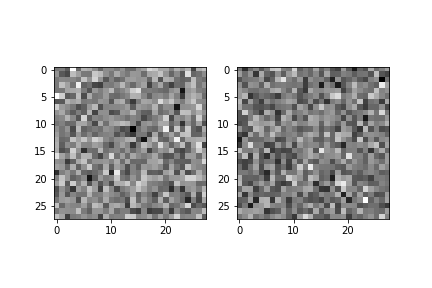

In [15]:
%matplotlib notebook

model.eval()
output,dec = model(data)


fig = plt.figure();
plt.subplot(1,2,1)
im1 = plt.imshow(torch.randn(28,28) ,cmap='gray', animated=True)
plt.subplot(1,2,2)
im2 = plt.imshow(torch.randn(28,28) ,cmap='gray', animated=True)
def updatefig(i):
    output,dec = model(data_6[100+i]) #torch.randn(28,28)
    im1.set_array(data_6[100+i].detach().numpy())
    im2.set_array(output.view(28,28).detach().numpy())
    plt.title(''.join(['frame:',str(i)]))
    return im2,
ani = animation.FuncAnimation(fig, updatefig, frames=1000,interval=100, blit=True)

In [14]:
%who

F	 Net	 ana_loader	 ani	 animation	 argparse	 ceriation	 data	 data_im	 
data_it_5	 data_it_l	 data_it_t	 data_la	 data_len	 data_len_i	 data_s	 datasets	 dec	 
device	 epoch	 fig	 i	 im1	 im2	 loss	 loss2	 model	 
model_loss	 nn	 np	 optim	 optimizer	 output	 plt	 print_function	 target	 
torch	 transforms	 updatefig	 


#### 构建想象模型

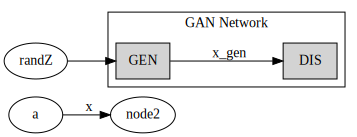

In [57]:
from graphviz import Source
code2='''
digraph G{
rankdir=LR;  //Rank Direction Left to Right
    a -> node2[label="x"];
    subgraph cluster0 {
        label ="GAN Network"
        node [shape=box,style=filled];
        GEN -> DIS [label="x_gen"]
    }
    randZ -> GEN
}
'''
t=Source(code2)
t